# Operações Morfológicas
1. Dilatação
2. Erosão
3. Dilatação e erosão em tons de cinza

In [1]:
import cv2 as cv
print("OpenCV: ", cv.__version__)
import numpy as np
print("numpy: ", np.__version__)
import matplotlib.pyplot as plt
plt.style.use('classic')
#%matplotlib
#%matplotlib notebook
#%matplotlib inline
%matplotlib widget
import scipy.ndimage as snd
from skimage.morphology import skeletonize

OpenCV:  4.7.0
numpy:  1.24.2


(1086, 663, 3)


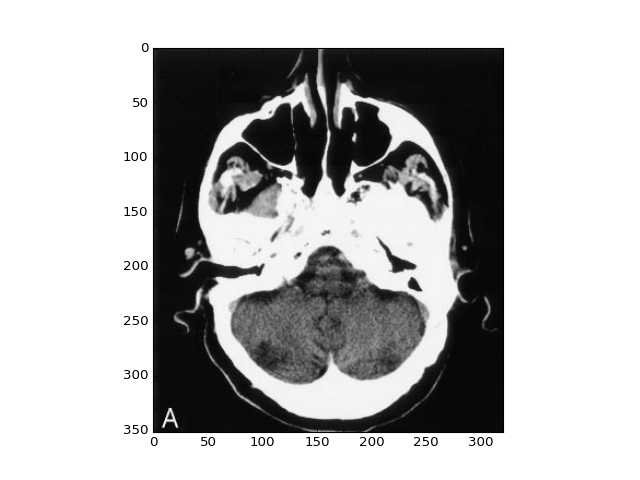

In [2]:
img = cv.imread('Imagens/image1.png')
print(img.shape)
lin, col = img.shape[:2]
img = img[:lin//3 - 10, :col//2 - 10,:]
fig = plt.figure()
ax = plt.axes()
ax.imshow(img, 'gray')

In [3]:
# Converting the image to grayscale.
imgG = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

(-0.5, 320.5, 351.5, -0.5)

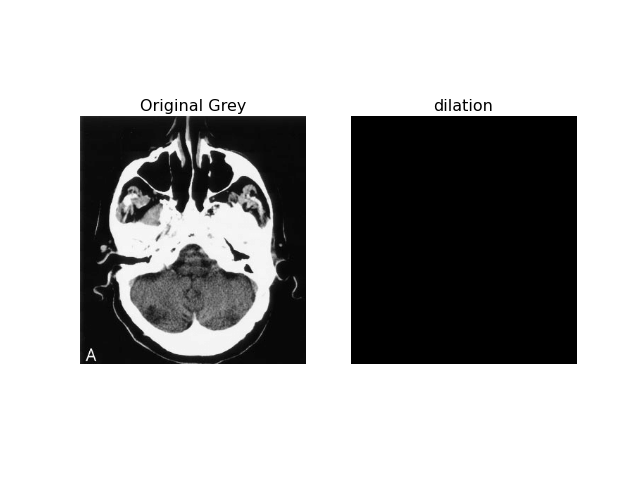

In [4]:
# Dilatação
# Performing binary dilation for 5 iterations.
imgDil = snd.binary_dilation(imgG, iterations=5)
imgDil = (imgDil*255)

fig, ax = plt.subplots(1,2)
ax[0].imshow(imgG, cmap='gray')
ax[0].set_title('Original Grey')
ax[0].axis('off')
ax[1].imshow(imgDil, cmap='gray')
ax[1].set_title('dilation')
ax[1].axis('off')


(-0.5, 320.5, 351.5, -0.5)

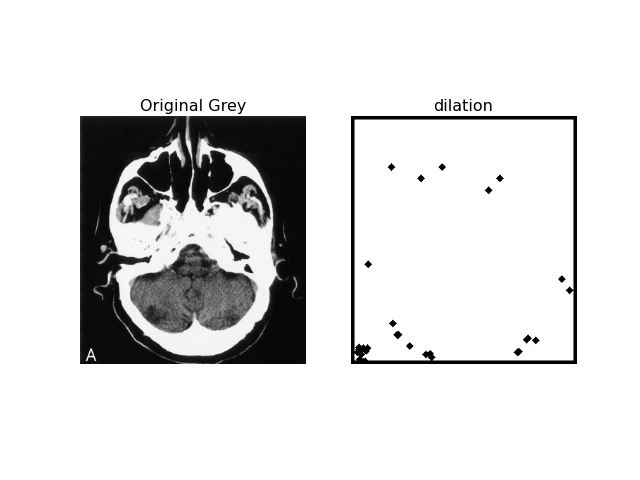

In [5]:
#Erosão
imgEro = snd.binary_erosion(imgG,iterations=5)
imgEro = imgEro*255

fig, ax = plt.subplots(1,2)
ax[0].imshow(imgG, cmap='gray')
ax[0].set_title('Original Grey')
ax[0].axis('off')
ax[1].imshow(imgEro, cmap='gray')
ax[1].set_title('dilation')
ax[1].axis('off')

(-0.5, 320.5, 351.5, -0.5)

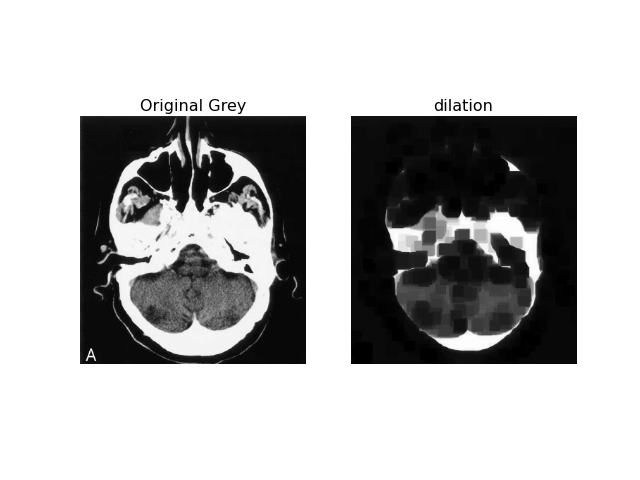

In [6]:
#Dilatação e erosão em tons de cinza
# Creating a structuring element.
footprint = np.ones((15, 15))
# Performing grey erosion.
imgGEr = snd.grey_erosion(imgG, footprint=footprint)

fig, ax = plt.subplots(1,2)
ax[0].imshow(imgG, cmap='gray')
ax[0].set_title('Original Grey')
ax[0].axis('off')
ax[1].imshow(imgGEr, cmap='gray')
ax[1].set_title('dilation')
ax[1].axis('off')

(-0.5, 320.5, 351.5, -0.5)

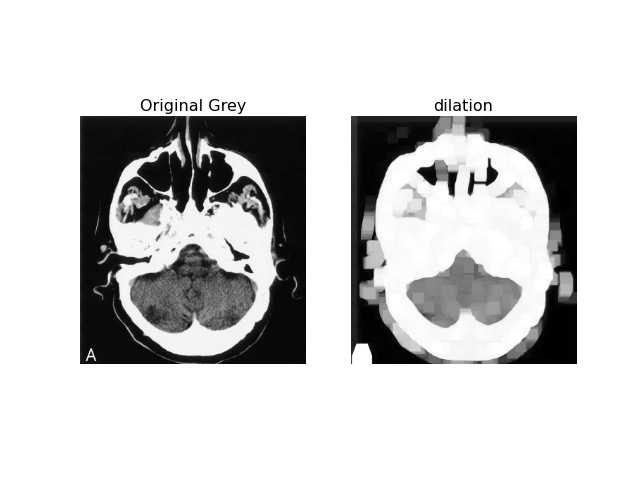

In [7]:
# Creating a structuring element.
footprint = np.ones((15,15))
# Performing grey dilation.
imgGDil = snd.grey_dilation(imgG, footprint=footprint)

fig, ax = plt.subplots(1,2)
ax[0].imshow(imgG, cmap='gray')
ax[0].set_title('Original Grey')
ax[0].axis('off')
ax[1].imshow(imgGDil, cmap='gray')
ax[1].set_title('dilation')
ax[1].axis('off')

(-0.5, 320.5, 351.5, -0.5)

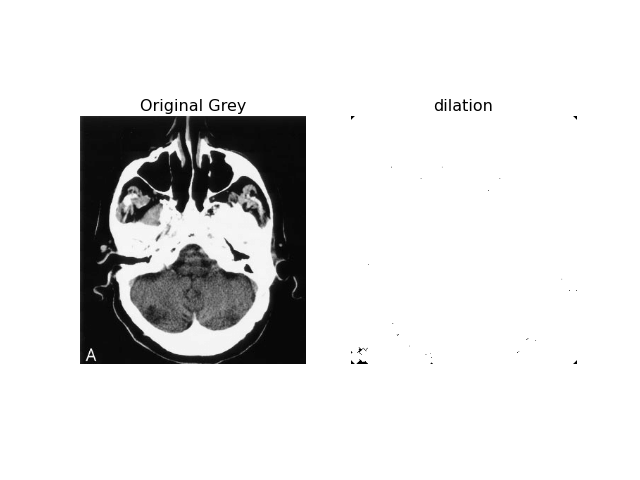

In [8]:
#Abertura e Fechamento
# Defining the structuring element.
s = [[0,1,0],[1,1,1], [0,1,0]]
# Performing the binary opening for 5 iterations.
imgOp = snd.binary_opening(imgG, structure=s, iterations=5)

fig, ax = plt.subplots(1,2)
ax[0].imshow(imgG, cmap='gray')
ax[0].set_title('Original Grey')
ax[0].axis('off')
ax[1].imshow(imgOp, cmap='gray')
ax[1].set_title('dilation')
ax[1].axis('off')

(-0.5, 320.5, 351.5, -0.5)

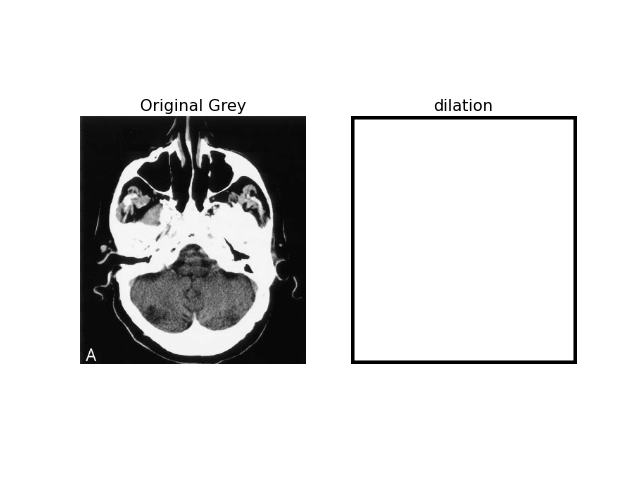

In [9]:
# Defining the structuring element.
s = [[0,1,0],[1,1,1], [0,1,0]]
# Performing the binary closing for 5 iterations.
imgCl = snd.binary_closing(imgG,structure=s,iterations=5)

fig, ax = plt.subplots(1,2)
ax[0].imshow(imgG, cmap='gray')
ax[0].set_title('Original Grey')
ax[0].axis('off')
ax[1].imshow(imgCl, cmap='gray')
ax[1].set_title('dilation')
ax[1].axis('off')

(-0.5, 320.5, 351.5, -0.5)

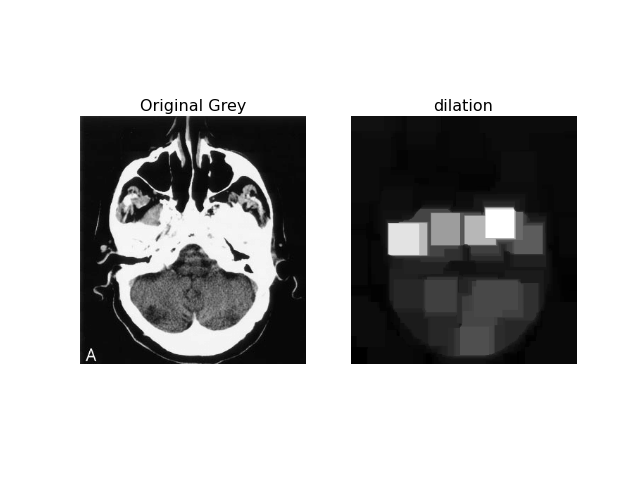

In [10]:
# Creating a structuring element.
footprint = np.ones((40,40))
# Performing grey opening.
imgGOp = snd.grey_opening(imgG,footprint=footprint)

fig, ax = plt.subplots(1,2)
ax[0].imshow(imgG, cmap='gray')
ax[0].set_title('Original Grey')
ax[0].axis('off')
ax[1].imshow(imgGOp, cmap='gray')
ax[1].set_title('dilation')
ax[1].axis('off')

(-0.5, 320.5, 351.5, -0.5)

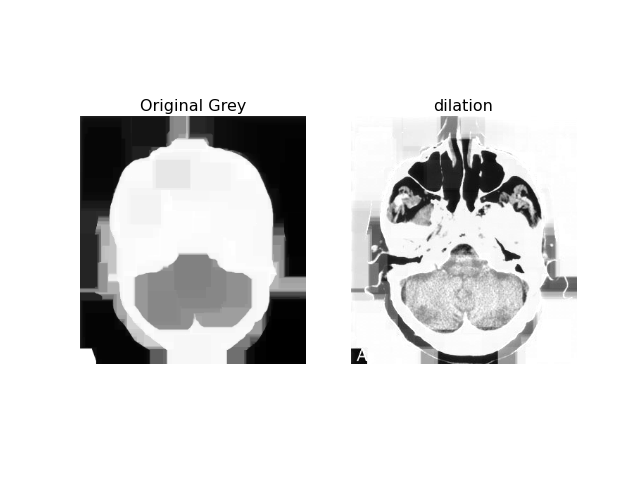

In [11]:
# Creating a structuring element.
fp = np.ones((40,40))
# Performing grey closing.
imgGClbg = snd.grey_closing(imgG,footprint=fp)
# bg represents the background.
# We will subtract bg from a to remove the background.
imgGClbg_free = (imgG.astype(np.float64) - imgGClbg.astype(np.float64))
# We rescale bg_free to 0 to 255.
denom = (imgGClbg_free.max() - imgGClbg_free.min())
imgGClbg_free = (imgGClbg_free - imgGClbg_free.min())*255 / denom
# Converting bg_free_norm to uint8.
imgGClbg_free = imgGClbg_free.astype(np.uint8)

fig, ax = plt.subplots(1,2)
ax[0].imshow(imgGClbg, cmap='gray')
ax[0].set_title('Original Grey')
ax[0].axis('off')
ax[1].imshow(imgGClbg_free, cmap='gray')
ax[1].set_title('dilation')
ax[1].axis('off')

(-0.5, 320.5, 351.5, -0.5)

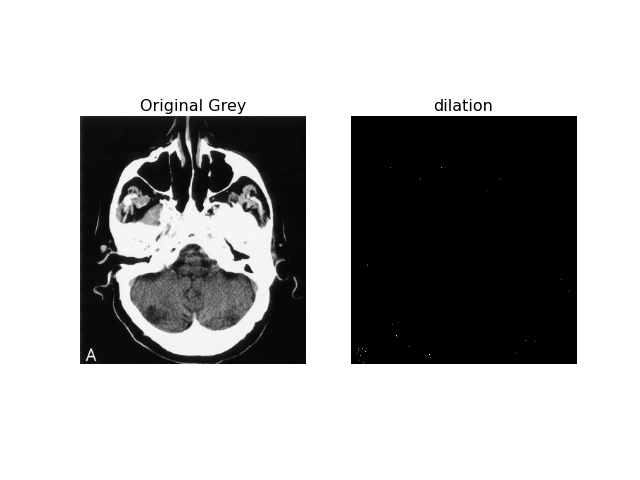

In [12]:
#Acertar ou errar
# Defining the structuring element.
structure1 = np.array([[1, 1, 0], [1, 1, 1],
             [1, 1, 1]])
# Performing the binary hit-or-miss.
imgHM = snd.binary_hit_or_miss(imgG, structure1=structure1)
imgHM = (imgHM*255).astype(np.uint8)

fig, ax = plt.subplots(1,2)
ax[0].imshow(imgG, cmap='gray')
ax[0].set_title('Original Grey')
ax[0].axis('off')
ax[1].imshow(imgHM, cmap='gray')
ax[1].set_title('dilation')
ax[1].axis('off')

(-0.5, 320.5, 351.5, -0.5)

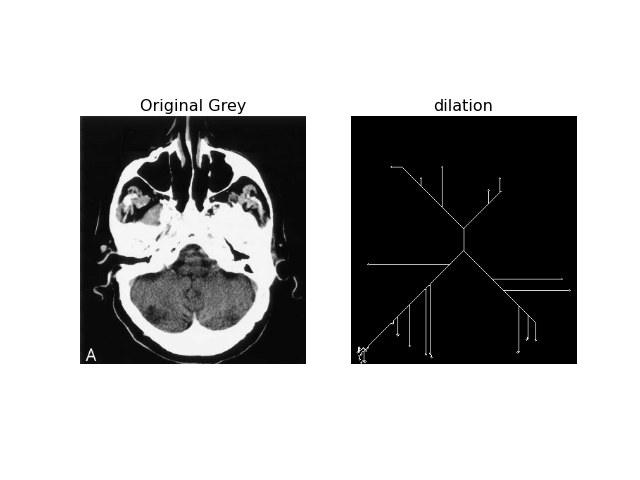

In [13]:
#Esqueletização
imgSkel = skeletonize(imgG)
imgSkel = (imgSkel*255).astype(np.uint8)

fig, ax = plt.subplots(1,2)
ax[0].imshow(imgG, cmap='gray')
ax[0].set_title('Original Grey')
ax[0].axis('off')
ax[1].imshow(imgSkel, cmap='gray')
ax[1].set_title('dilation')
ax[1].axis('off')